#  <center>FBN Data Science Take-Home Question </center> 

![FBN-color-logo.jpeg](https://farmandlivestockdirectory.com/wp-content/uploads/FBN-color-logo.jpeg)

<center> By : Juan Pérez-Arango </center>

This jupyter notebook contains all the information related to the FBN Data Science Question including the code, the results and some insights 

## Step 0. Importing all the necessary libraries from python

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Step 1. Importing data from local folder


In [52]:
planting = pd.read_csv('../data/planting_sample_data.csv')
harvest = pd.read_csv('../data/harvest_sample_data.csv')

### Step 1.1. Getting to know the data
In this step I will explore the data to know the structure, the unique values in the data and to identify any missing values. This will allow me to understand the data better and to think about which could be a good way to explore it initially

In [53]:
planting.head()

,long,lat,variety,seeding_rate,seed_spacing,speed
0,-91.850532,40.376043,P1498,47.6142,4.3913,1.90
1,-91.850519,40.376043,P1498,47.6412,4.3888,2.11
2,-91.850504,40.376043,P1498,47.6412,4.3888,2.52
3,-91.850487,40.376043,P1498,47.6412,4.3888,2.94
4,-91.850467,40.376043,P1498,34.6421,6.0357,3.37


In [54]:
print('The Planting file '+str(len(planting))+' rows') #Here I am checking the size of the file

The Planting file 6314 rows


In [55]:
planting.variety.unique()

array(['P1498', 'DKC63-33RIB'], dtype=object)

In [56]:
list(range(len(planting.variety.unique())))

[0, 1]

In [57]:
#I replace the variety by numbers depending on the different varieties, in this case 0,1 for 2 varieties
planting = planting.replace(planting.variety.unique(),list(range(len(planting.variety.unique()))))

In [58]:
# Checking for gaps in the file
planting.isna().sum() 

long            0
lat             0
variety         0
seeding_rate    0
seed_spacing    0
speed           0
dtype: int64

This shows there is only two varieties of seeds planted in this field P1498, and DKC63-33RIB

In [59]:
# In a similar way I can check the harvest dataframe
harvest.head()

,long,lat,yield
0,-91.849991,40.376097,88.451156
1,-91.849992,40.376106,102.173517
2,-91.849992,40.376116,191.420756
3,-91.849992,40.376127,236.556217
4,-91.849993,40.376139,224.822367


In [60]:
print('The harvest file has '+str(len(harvest))+' rows') 

The harvest file has 16626 rows


In [61]:
# Checking for gaps in the file
harvest.isna().sum() 

long     0
lat      0
yield    0
dtype: int64

As I can see from this, the harvest file contains more data than the planting file.  Here the function required in the part A of the Question should be implemented to get a single file with the planting and harvest information together

In [62]:
#Checking if there are common values in longitude column between the 2 dataframes
print(sum(planting.long.isin(harvest.long).astype(int)), sum(planting.lat.isin(harvest.lat).astype(int)))

0 0


This is a sign that rounding the latitude and longitude values is necessary as the precision is to high to be coincidence between the two same points everytime in every file

In [63]:
new_planting = planting.round(4)
new_harvest = harvest.round(4)

In [64]:
new_planting.shape , new_harvest.shape

((6314, 6), (16626, 3))

In [65]:
# Doing an exploratory merging process by merging the two df into one, 
# and calculating the mean values of the speeds and yields

# Merging the two dataframes 


crop = new_planting.merge(new_harvest, 
                how='right')
crop = crop.groupby(['lat','long','variety'], as_index=False)[['seeding_rate', 'seed_spacing', 'speed','yield']].mean().reset_index()
crop

,index,lat,long,variety,seeding_rate,seed_spacing,speed,yield
0,0,40.3759,-91.8506,1.0,0.000000,0.000000,0.020000,254.314930
1,1,40.3759,-91.8505,1.0,35.784671,5.843829,2.971429,236.583817
2,2,40.3759,-91.8504,1.0,35.261100,5.929725,4.347500,290.148567
3,3,40.3759,-91.8503,1.0,35.212900,5.937840,4.356000,263.198717
4,4,40.3759,-91.8502,1.0,35.221850,5.936325,4.370000,266.890550
...,...,...,...,...,...,...,...,...
1225,1225,40.3794,-91.8465,1.0,35.242850,5.932800,4.475000,247.085083
1226,1226,40.3794,-91.8463,1.0,35.426700,5.902020,4.442000,226.402020
1227,1227,40.3794,-91.8462,1.0,35.353600,5.914225,4.465000,235.122440
1228,1228,40.3794,-91.8461,1.0,35.301100,5.924750,3.963333,195.312000


## Step 2. Part A - Associate the Planter and Harvester Data

Take two arguments : the planting filename and the harvest filename

In [66]:
# Declare two variables containing the planter and harvester filenames

planter_fn = ('../data/planting_sample_data.csv')
harvester_fn = ('../data/harvest_sample_data.csv')

Parts A.2 and A.3 Create a function to read the files and return a dataframe with the same number of rows as the harvest file

In [67]:
# Defining the function, its arguments and the result


def crop_int(plant, harv):
    """
    This function reads the data from the planter (plant) and harvester (harv)
    files and creates a new dataframe with the integrated data to be analyzed later
    """
    import timeit #To estimate the running time

    start = timeit.timeit()

    planter = pd.read_csv(plant)
    harvest = pd.read_csv(harv)
    
    #In this part of the function the variety feature (string) is replaced by a numeric value 
    variety_array = planter.variety.unique()
    n_variety = len(variety_array)
    
    planter = planter.replace(variety_array,list(range(n_variety)))
    
    #The user is notified what changes where made to the original data
    for nv in range(n_variety):
        print('The variety ' + variety_array[nv] + ' has been replaced by the numeric value ' + str(nv) )
    
    #Here both dataframes are merged into one by grouping using latitude and longitude and preserving the same number
    #of rows of harvest file. Before merging the data, latitude and longitude values are round to 4 decimals.
    new_planting = planter.round(4)
    new_harvest = harvest.round(4)
    
    crop = new_planting.merge(new_harvest, how='right')
            
    crop.to_csv('../data/merged_plant_harvest.csv')
    end = timeit.timeit()
    print('This function was executed in ' + str(round((start - end), 5)) + 'seconds')
    return


In [68]:
# Testing the function

crop_int(planter_fn, harvester_fn)


The variety P1498 has been replaced by the numeric value 0
The variety DKC63-33RIB has been replaced by the numeric value 1
This function was executed in -0.00055seconds


### *Insights about the preprocessing part and the part A of the take-home question*

The pre-processing phase contains to main parts: 
 - An exploration of the provided data to understand its structure
 - The function that will allow us to read the data and produce a new .csv file preserving the same number of rows the harvest file has.

In the exploratory part, I did a quick check on the data properties, mostly related to the type of values (strings, floats, integers), the different features in the data set and the structure of the data in both cases, i.e., the planting and harvest files. I also checked for NaN values and some other general aspects of the files.

Before making the function, I coded the lines to check their functionality. I found that, given the nature of the latitude and longitude values and resolution, there is zero coincidence between the two data sets for those specific columns. Having six decimals makes these values hard to match, so I decided to round the variables up to 4 decimals.  I could have included some more lines in the function for verifying that the number of rows in the output files matches the number of rows in the harvest file ( I did it in the pre-processing) . In the same sense, a line can be included to check all the rows, and labels are in place. I did not do it to make the function more efficient in terms of the time spent running.

The code is straightforward and gives us the necessary information we need. It is possible to create a function that parses the arguments from the command line, or that checks for error in the inputs.



## Step 3. Part B - Exploratory Data Analysis

For this part it is necessary to use the function in part A.

### Step 3.1. Exploratory analysis

As a first step I decided to group the data and as some longitudes and latitudes values are repeated. For doing it so, I used the mean values on the seeding rate, the seeding spacing, the driving speed of the planter and the yield values.

In [69]:
#Defining the file paths, and using the function I created in part A.
planter_fn = ('../data/planting_sample_data.csv')
harvester_fn = ('../data/harvest_sample_data.csv')
crop_int(planter_fn, harvester_fn)

The variety P1498 has been replaced by the numeric value 0
The variety DKC63-33RIB has been replaced by the numeric value 1
This function was executed in 0.00027seconds


In [70]:
crop = crop.groupby(['lat','long','variety'], 
                    as_index=False)[['seeding_rate', 
                                     'seed_spacing', 'speed','yield']].mean()

In [76]:
crop.head()  #here is a reduced data set with unique values of lat and lon after cleaning the data

,lat,long,variety,seeding_rate,seed_spacing,speed,yield
0,40.3759,-91.8506,1.0,0.000000,0.000000,0.020000,254.314930
1,40.3759,-91.8505,1.0,35.784671,5.843829,2.971429,236.583817
2,40.3759,-91.8504,1.0,35.261100,5.929725,4.347500,290.148567
3,40.3759,-91.8503,1.0,35.212900,5.937840,4.356000,263.198717
4,40.3759,-91.8502,1.0,35.221850,5.936325,4.370000,266.890550


In [100]:
#Calculating Statitical values and some visualizations of for example heatmaps of correlations
mean_v0 = short_crop.loc[short_crop['variety'] == 0].mean(); mean_v1 = short_crop.loc[short_crop['variety'] == 1].mean()
std_v0 = short_crop.loc[short_crop['variety'] == 0].std(); std_v1 = short_crop.loc[short_crop['variety'] == 1].std()
corr_v0 = short_crop.loc[short_crop['variety'] == 0].corr(); corr_v1 = short_crop.loc[short_crop['variety'] == 1].corr()
corr_v0 = corr_v0.drop('variety')
corr_v1 = corr_v1.drop('variety')

mean_v0, mean_v1, std_v0, std_v1


(variety           0.000000
 seeding_rate     36.351263
 seed_spacing      5.773439
 speed             4.057467
 yield           230.275456
 dtype: float64,
 variety           1.000000
 seeding_rate     36.786251
 seed_spacing      5.677119
 speed             4.680193
 yield           231.272978
 dtype: float64,
 variety          0.000000
 seeding_rate     1.899497
 seed_spacing     0.322153
 speed            0.571797
 yield           22.567507
 dtype: float64,
 variety          0.000000
 seeding_rate     2.298156
 seed_spacing     0.816899
 speed            0.363571
 yield           21.409011
 dtype: float64)

With this simple calculation it is possible to describe two very important aspect of the variables,the mean and the standard deviations. I separated the variables according to the type of seed, and the results are comparable. For the type-0 seed the mean yield was 230.3 bushels/acre while the type-2 seed produced 231.3 bushels/acre. In the same context, the standard deviations are 22.6 and 21.4 respectively. Although the mean values for the other variables do not have a significant difference (here I am not referring to statistically significant, as this requires a different analysis, like a Welch's-t test), the standard deviations exhibit some differences.

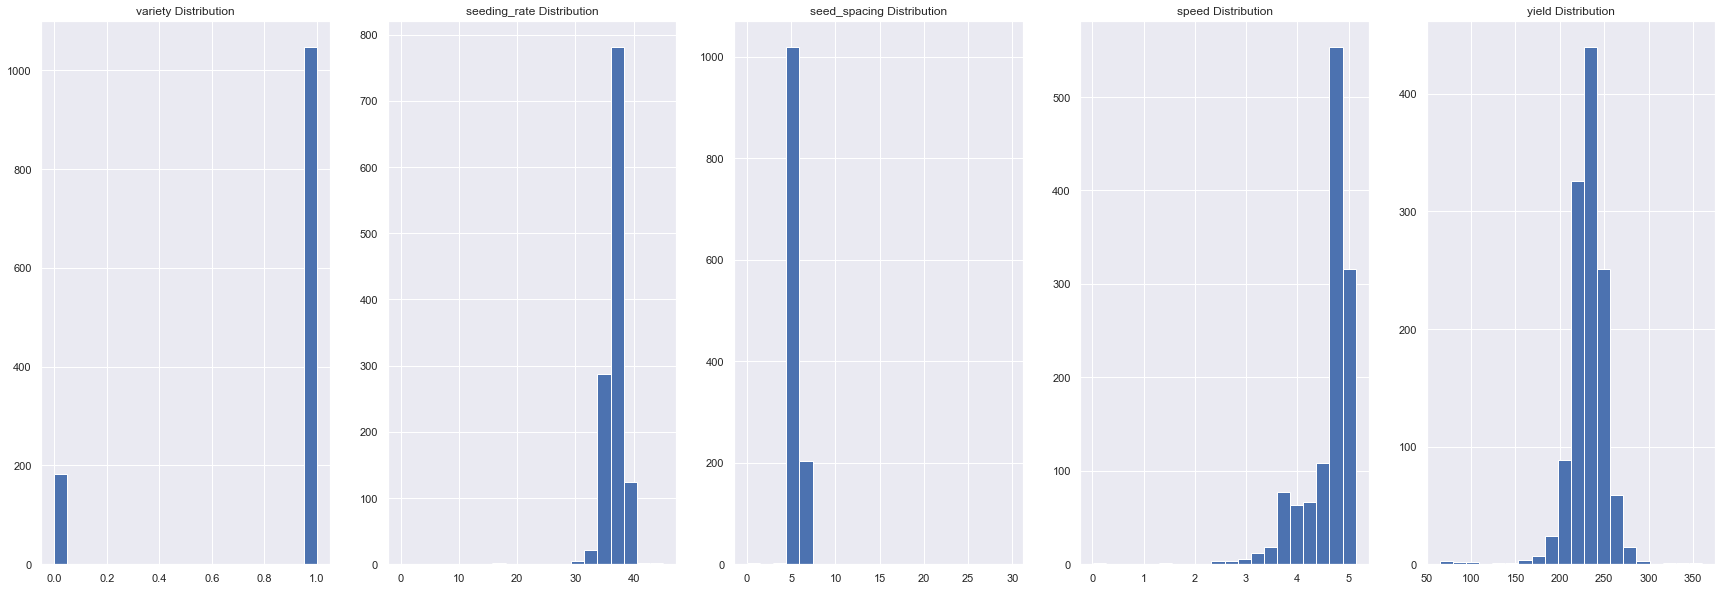

In [101]:
# After I will perform some histogram plots to better understand the general distribution of the variables, regardless of the location.

short_crop = crop.drop(['lat','long'], axis=1)

# A short function to draw some histograms
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax,figsize=(30,10))
        ax.set_title(var_name+" Distribution")
    
    plt.show()
    return

draw_histograms(short_crop, short_crop.columns, 1, 5)

The previous histograms were made to explore the distribution of the different variables in the files. It is not intended to explore a specific distribution (i.e. Gaussian, or something in particular) it is more a descriptive way of showing the data values. The yield, for instance, has a peak value of the distribution around 230 bushels/acre, with a gaussian shape (this needs to be proved by performing a test). This simple figure gives us an idea of the yielded product in October, with some values around the mean that in the most extreme case goes up to 300 bushels/acre. There are some extremely law values when compared to the mean (240), and those should be double checked with the farmer to understand better where are they coming from. In the case of the speed distribution, there is a clear evidence that in the most of the cases the planting speed was 4.8 miles/hour

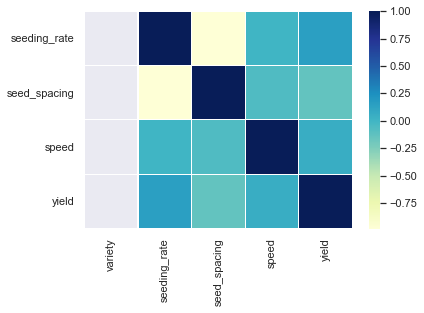

In [104]:
import seaborn as sns; sns.set()
ax = sns.heatmap(corr_v0, linewidths=0.1, cmap="YlGnBu", center=0)

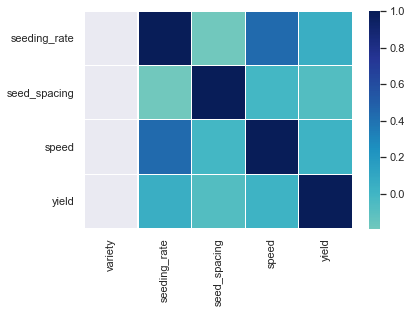

In [105]:
import seaborn as sns; sns.set()
ax = sns.heatmap(corr_v1, linewidths=0.1, cmap="YlGnBu", center=0)

Heatmaps are very cool visualizations when we want to evaluate variations among variables. As this is an exploratory analysis, I built the heatmaps based on the correlation values among the multiple values.  I centered both heatmaps in zero to compare them properly.  The first map corresponds to the values associated to the seed type 0, the second one corresponds to the seed type 1. There are some high negative values of correlation, in particular between the seeding rate and the seed spacing. It would be good to know the characteristics of the type 0 seed and how they affect the spacing and planting rate as the correlation is negative. For a client or a customer this a practical way of showing some interesting relationships.

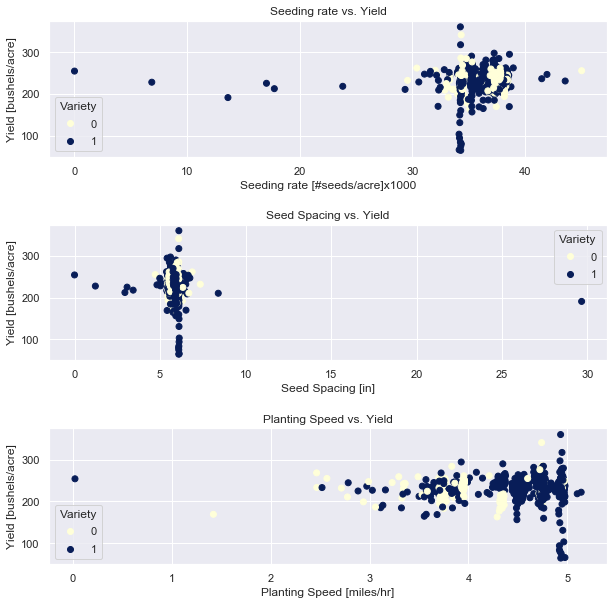

In [95]:
#Here some exploration on the relationship between variables for the different varietys

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, 
                                    ncols=1,
                                    figsize=(10,10))
scatter = ax0.scatter(x=crop['seeding_rate'],
                      y=crop['yield'],
                      c=crop['variety'],
                      cmap = 'YlGnBu')
ax0.set(title='Seeding rate vs. Yield',
        xlabel='Seeding rate [#seeds/acre]x1000',
        ylabel='Yield [bushels/acre]')
ax0.legend(*scatter.legend_elements(), title='Variety')

scatter = ax1.scatter(x=crop['seed_spacing'],
                      y=crop['yield'],
                      c=crop['variety'],
                      cmap = 'YlGnBu')
ax1.set(title='Seed Spacing vs. Yield',
        xlabel='Seed Spacing [in]',
        ylabel='Yield [bushels/acre]')

ax1.legend(*scatter.legend_elements(), title='Variety')

scatter = ax2.scatter(x=crop['speed'],
                      y=crop['yield'],
                      c=crop['variety'],
                      cmap = 'YlGnBu')
ax2.set(title='Planting Speed vs. Yield',
        xlabel='Planting Speed [miles/hr]',
        ylabel='Yield [bushels/acre]')
ax2.legend(*scatter.legend_elements(), title='Variety')
plt.subplots_adjust(hspace=0.5)

Finally I plotted some scattered figures to describe the relationship among the different planting variables and the result associated to them that translates into yield. At first sight it is hard to establish a particular pattern where we can say that if we increase or decrease any of the values in the three planting variables (i.e. Seeding rate, seed spacing or planting speed, we will see changes in the yielded product).

If I would have more data I would like to explore two types of approaches. The first would be a prediction model (less -likely) where I will explore if it is possible to predict yield values based on any or all of the variables associated to the planting process. At first sight, I do not see any direct relation that indicates an increase in the yielded product by changing some planting variables. But out of curiosity I will try a ML method to see if I can get to some point. The other approach will be to think about this dataset as a good candidate for a classification model (like k-neighbors) where yield values are grouped according to some characteristics in the plantation process.

Either one or the other will require two more things I would add. A spatial representation of the data, i.e. plot the data with the lat, lon information we have and match it with satellite/topography data to check if there is any variation in space linked to the shape of the terrain or something else. More data associated to the yielded product like for example irrigation, weather, agrochemical aspersion rates among others.